### 1) Importing Library and Dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

In [2]:
# Importing movies_modified_3.csv dataframe

path = r'/Users/matthewabrams/Desktop/Movie Analysis'

movies = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'movies_modified_3.csv'), index_col = False)

movies.drop(columns = 'Unnamed: 0', inplace = True)

movies

,name,rating,unknown rating,genre,year,IMDb score,average IMDb score for country per film,votes,average number of votes for country per film,director,...,gross,average gross for country per film,profit,average profit for country per film,gross category,company,unknown company,duration (in min),released date,unknown released date
0,The Shining,R,False,Drama,1980,8.4,6.4,927000.0,95064.85761,Stanley Kubrick,...,46998772.0,86317303.02,27998772.0,52914083.47,20-100 M,Warner Bros.,False,146.0,1980-06-13,False
1,The Blue Lagoon,R,False,Adventure,1980,5.8,6.4,65000.0,95064.85761,Randal Kleiser,...,58853106.0,86317303.02,54353106.0,52914083.47,20-100 M,Columbia Pictures,False,104.0,1980-07-02,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,False,Action,1980,8.7,6.4,1200000.0,95064.85761,Irvin Kershner,...,538375067.0,86317303.02,520375067.0,52914083.47,> 100 M,Lucasfilm,False,124.0,1980-06-20,False
3,Airplane!,PG,False,Comedy,1980,7.7,6.4,221000.0,95064.85761,Jim Abrahams,...,83453539.0,86317303.02,79953539.0,52914083.47,20-100 M,Paramount Pictures,False,88.0,1980-07-02,False
4,Caddyshack,R,False,Comedy,1980,7.3,6.4,108000.0,95064.85761,Harold Ramis,...,39846344.0,86317303.02,33846344.0,52914083.47,20-100 M,Orion Pictures,False,98.0,1980-07-25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,True,Drama,2020,3.1,6.4,18.0,95064.85761,Joseph Ebanks,...,20205757.0,86317303.02,20198757.0,52914083.47,20-100 M,NaN,True,90.0,2020-10-23,False
7664,Dream Round,NaN,True,Comedy,2020,4.7,6.4,36.0,95064.85761,Dusty Dukatz,...,20205757.0,86317303.02,-294243.0,52914083.47,20-100 M,Cactus Blue Entertainment,False,90.0,2020-02-07,False
7665,Saving Mbango,NaN,True,Drama,2020,5.7,5.7,29.0,29.00000,Nkanya Nkwai,...,20205757.0,20205757.00,20147007.0,20147007.00,20-100 M,Embi Productions,False,104.0,2020-04-27,False
7666,It's Just Us,NaN,True,Drama,2020,6.4,6.4,33000.0,95064.85761,James Randall,...,20205757.0,86317303.02,20190757.0,52914083.47,20-100 M,NaN,True,120.0,2020-10-01,False


### 2) Subsetting and Data Wrangling

In [3]:
# Performing a time series analysis on all films made each year specifically from the US. 
# I need to create a subset which firstly filters out films which aren't from the US.


In [4]:
# Subset of dataframe returning values where country is United States

movies_us = movies[movies['country']=='United States']
movies_us

,name,rating,unknown rating,genre,year,IMDb score,average IMDb score for country per film,votes,average number of votes for country per film,director,...,gross,average gross for country per film,profit,average profit for country per film,gross category,company,unknown company,duration (in min),released date,unknown released date
0,The Shining,R,False,Drama,1980,8.4,6.4,927000.0,95064.85761,Stanley Kubrick,...,46998772.0,86317303.02,27998772.0,52914083.47,20-100 M,Warner Bros.,False,146.0,1980-06-13,False
1,The Blue Lagoon,R,False,Adventure,1980,5.8,6.4,65000.0,95064.85761,Randal Kleiser,...,58853106.0,86317303.02,54353106.0,52914083.47,20-100 M,Columbia Pictures,False,104.0,1980-07-02,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,False,Action,1980,8.7,6.4,1200000.0,95064.85761,Irvin Kershner,...,538375067.0,86317303.02,520375067.0,52914083.47,> 100 M,Lucasfilm,False,124.0,1980-06-20,False
3,Airplane!,PG,False,Comedy,1980,7.7,6.4,221000.0,95064.85761,Jim Abrahams,...,83453539.0,86317303.02,79953539.0,52914083.47,20-100 M,Paramount Pictures,False,88.0,1980-07-02,False
4,Caddyshack,R,False,Comedy,1980,7.3,6.4,108000.0,95064.85761,Harold Ramis,...,39846344.0,86317303.02,33846344.0,52914083.47,20-100 M,Orion Pictures,False,98.0,1980-07-25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,The Robinsons,NaN,True,Action,2020,6.4,6.4,33000.0,95064.85761,Directors,...,20205757.0,86317303.02,20195757.0,52914083.47,20-100 M,NaN,True,90.0,2020-11-10,False
7663,More to Life,NaN,True,Drama,2020,3.1,6.4,18.0,95064.85761,Joseph Ebanks,...,20205757.0,86317303.02,20198757.0,52914083.47,20-100 M,NaN,True,90.0,2020-10-23,False
7664,Dream Round,NaN,True,Comedy,2020,4.7,6.4,36.0,95064.85761,Dusty Dukatz,...,20205757.0,86317303.02,-294243.0,52914083.47,20-100 M,Cactus Blue Entertainment,False,90.0,2020-02-07,False
7666,It's Just Us,NaN,True,Drama,2020,6.4,6.4,33000.0,95064.85761,James Randall,...,20205757.0,86317303.02,20190757.0,52914083.47,20-100 M,NaN,True,120.0,2020-10-01,False


In [5]:
movies_us.columns

Index(['name', 'rating', 'unknown rating', 'genre', 'year', 'IMDb score',
       'average IMDb score for country per film', 'votes',
       'average number of votes for country per film', 'director', 'writer',
       'unknown writer', 'star', 'unknown star', 'country', 'unknown country',
       'budget', 'average budget for country per film', 'gross',
       'average gross for country per film', 'profit',
       'average profit for country per film', 'gross category', 'company',
       'unknown company', 'duration (in min)', 'released date',
       'unknown released date'],
      dtype='object')

In [6]:
# Focusing on two columns of dataframe: 'year' and 'profit'

profit_year = movies_us[['year', 'profit']]
profit_year

,year,profit
0,1980,27998772.0
1,1980,54353106.0
2,1980,520375067.0
3,1980,79953539.0
4,1980,33846344.0
...,...,...
7662,2020,20195757.0
7663,2020,20198757.0
7664,2020,-294243.0
7666,2020,20190757.0


In [7]:
# Get average of profit earnings per year
profit_year = profit_year.groupby('year')['profit'].mean()
profit_year

year
1980    1.458296e+07
1981    1.037465e+07
1982    1.372142e+07
1983    8.995819e+06
1984    7.342482e+06
1985    5.071412e+06
1986    4.073910e+06
1987    6.828374e+06
1988    1.047792e+07
1989    1.576147e+07
1990    1.761649e+07
1991    1.438656e+07
1992    1.948027e+07
1993    2.355436e+07
1994    2.331699e+07
1995    2.390547e+07
1996    2.339717e+07
1997    3.727209e+07
1998    2.958475e+07
1999    3.843698e+07
2000    4.194246e+07
2001    5.246055e+07
2002    6.090004e+07
2003    6.387768e+07
2004    6.554963e+07
2005    5.900726e+07
2006    6.202171e+07
2007    7.344373e+07
2008    8.162949e+07
2009    9.310110e+07
2010    1.021333e+08
2011    1.144188e+08
2012    1.182459e+08
2013    1.126430e+08
2014    1.059418e+08
2015    1.074876e+08
2016    1.085407e+08
2017    1.132830e+08
2018    1.165539e+08
2019    1.194546e+08
2020    8.620608e+07
Name: profit, dtype: float64

In [8]:
# Making the last line of code into a custom dataframe

profit_year = pd.DataFrame(profit_year)
profit_year

,profit
year,
1980,1.458296e+07
1981,1.037465e+07
1982,1.372142e+07
1983,8.995819e+06
1984,7.342482e+06
1985,5.071412e+06
1986,4.073910e+06
1987,6.828374e+06
1988,1.047792e+07


In [9]:
# Reset index

profit_year = profit_year.reset_index()

In [10]:
# Create a datetime column from 'year'
# Set the datetime as the index of the dataframe
# pd.offsets.YearEnd() will return the last day of the year instead of the first year

profit_year['datetime'] = pd.to_datetime(profit_year['year'], format='%Y') + pd.offsets.YearEnd()
profit_year = profit_year.set_index('datetime') 
profit_year



,year,profit
datetime,,
1980-12-31,1980,1.458296e+07
1981-12-31,1981,1.037465e+07
1982-12-31,1982,1.372142e+07
1983-12-31,1983,8.995819e+06
1984-12-31,1984,7.342482e+06
1985-12-31,1985,5.071412e+06
1986-12-31,1986,4.073910e+06
1987-12-31,1987,6.828374e+06
1988-12-31,1988,1.047792e+07


In [11]:
# Creating a moving average column
# rolling(5).mean() will represent the five-year moving average regarding profit earnings

profit_year['five-year moving average'] = profit_year['profit'].rolling(5).mean()
profit_year.head(10)

,year,profit,five-year moving average
datetime,,,
1980-12-31,1980,1.458296e+07,NaN
1981-12-31,1981,1.037465e+07,NaN
1982-12-31,1982,1.372142e+07,NaN
1983-12-31,1983,8.995819e+06,NaN
1984-12-31,1984,7.342482e+06,1.100347e+07
1985-12-31,1985,5.071412e+06,9.101156e+06
1986-12-31,1986,4.073910e+06,7.841008e+06
1987-12-31,1987,6.828374e+06,6.462399e+06
1988-12-31,1988,1.047792e+07,6.758820e+06


In [12]:
# Drop year column

profit_year.drop(['year'], axis = 1, inplace=True)

In [13]:
profit_year

,profit,five-year moving average
datetime,,
1980-12-31,1.458296e+07,NaN
1981-12-31,1.037465e+07,NaN
1982-12-31,1.372142e+07,NaN
1983-12-31,8.995819e+06,NaN
1984-12-31,7.342482e+06,1.100347e+07
1985-12-31,5.071412e+06,9.101156e+06
1986-12-31,4.073910e+06,7.841008e+06
1987-12-31,6.828374e+06,6.462399e+06
1988-12-31,1.047792e+07,6.758820e+06


### 3) Plotting the subset 

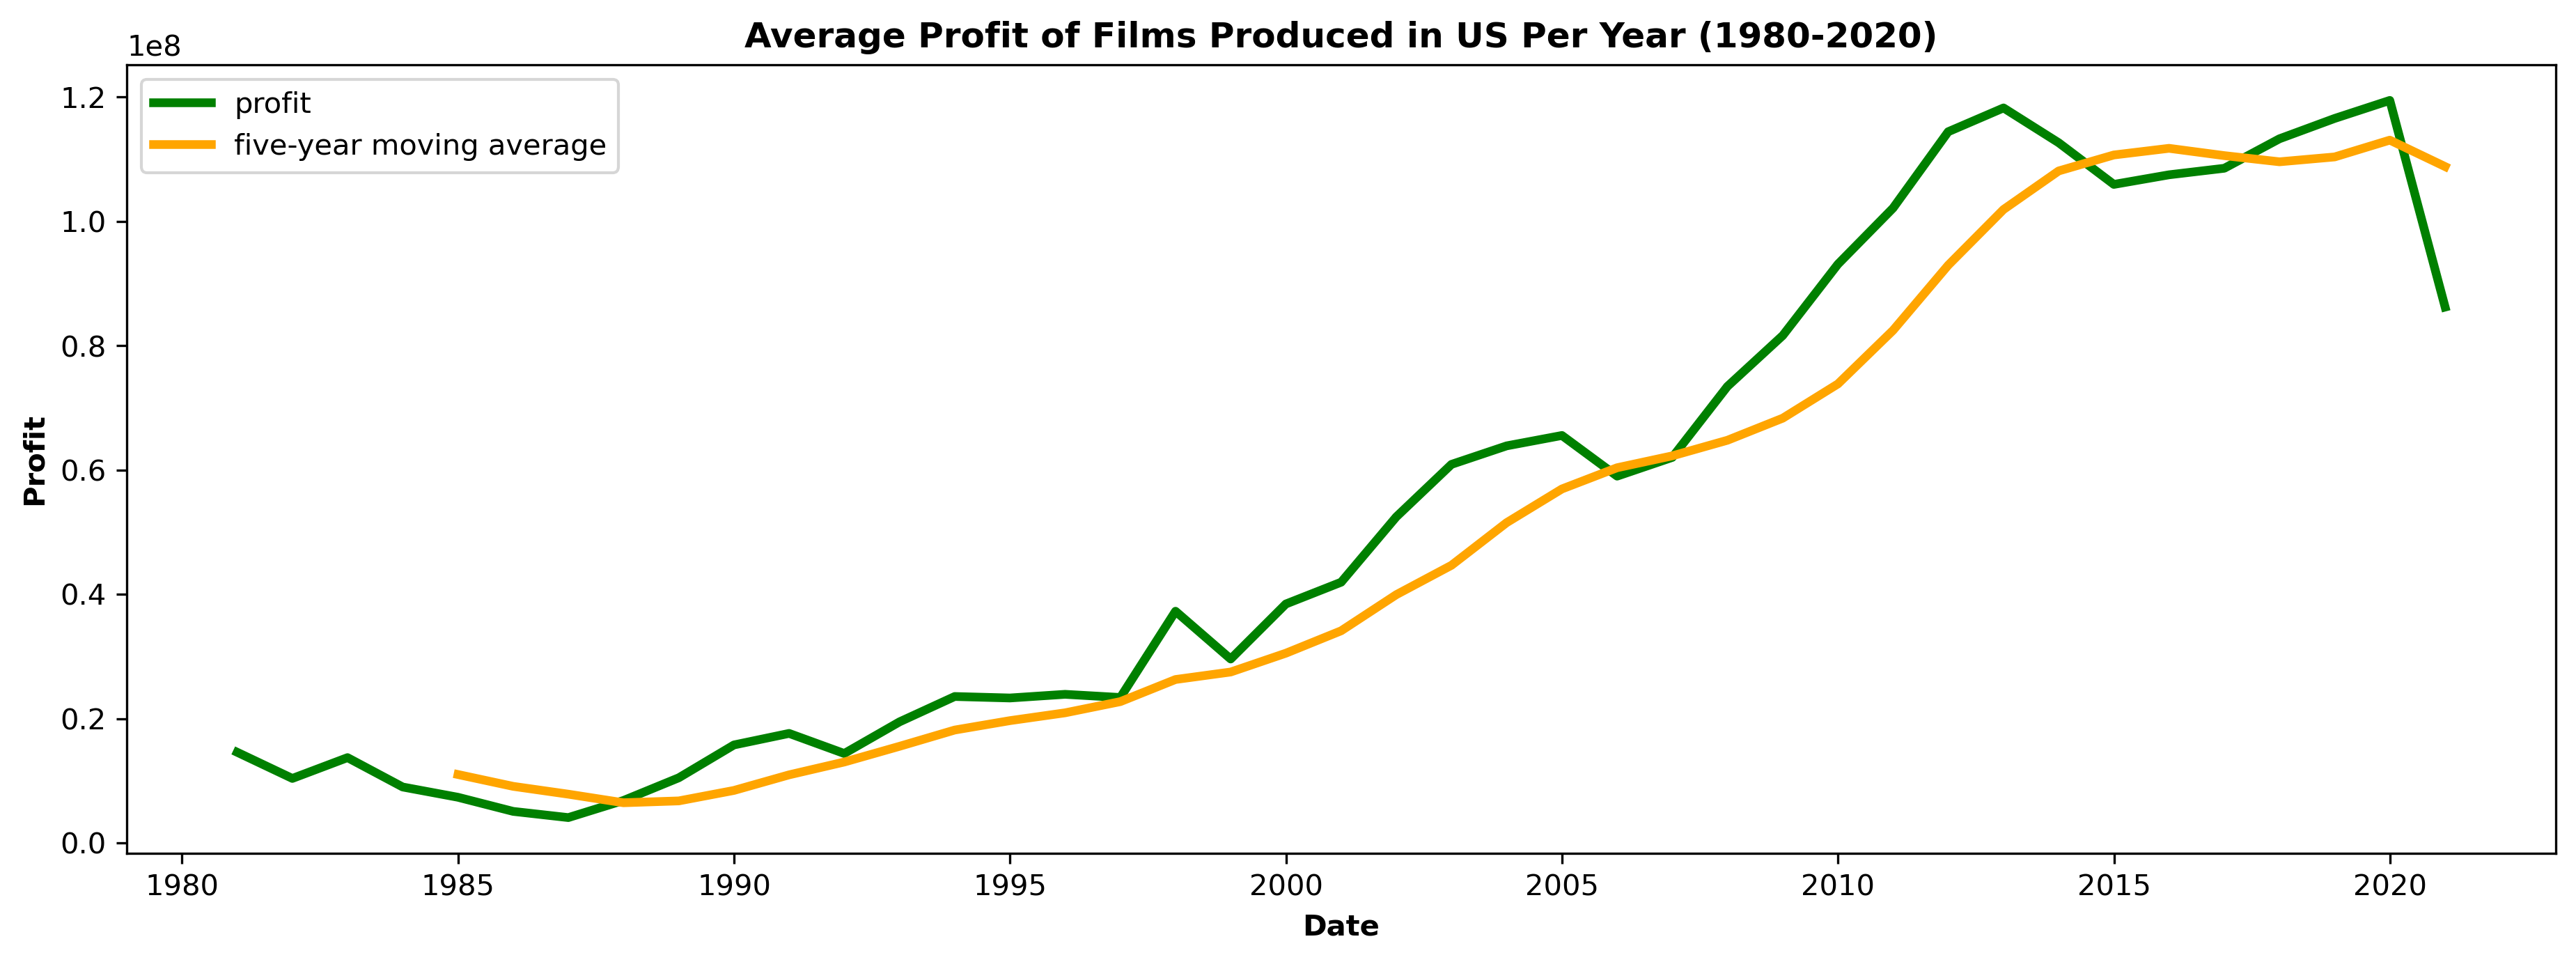

In [14]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi = 300)
plt.plot(profit_year.index, profit_year['profit'], linewidth = 3, color = 'green')
plt.plot(profit_year.index, profit_year['five-year moving average'], linewidth = 3, color = 'orange')
plt.title('Average Profit of Films Produced in US Per Year (1980-2020)', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 10, fontweight = 'bold')
plt.ylabel('Profit', fontsize = 10, fontweight = 'bold')
plt.legend(('profit', 'five-year moving average'))

In [15]:
# Average profit in production of films in US have steadily increased
# Average profit has peaked around 2019
# After 2020 started, average profit started to plummet

### 4) Time-series analysis: decomposition for profit column

In [16]:
profit = profit_year
profit

,profit,five-year moving average
datetime,,
1980-12-31,1.458296e+07,NaN
1981-12-31,1.037465e+07,NaN
1982-12-31,1.372142e+07,NaN
1983-12-31,8.995819e+06,NaN
1984-12-31,7.342482e+06,1.100347e+07
1985-12-31,5.071412e+06,9.101156e+06
1986-12-31,4.073910e+06,7.841008e+06
1987-12-31,6.828374e+06,6.462399e+06
1988-12-31,1.047792e+07,6.758820e+06


In [17]:
# Dropping five-year moving average column 

profit.drop(columns = 'five-year moving average', inplace = True)
profit

,profit
datetime,
1980-12-31,1.458296e+07
1981-12-31,1.037465e+07
1982-12-31,1.372142e+07
1983-12-31,8.995819e+06
1984-12-31,7.342482e+06
1985-12-31,5.071412e+06
1986-12-31,4.073910e+06
1987-12-31,6.828374e+06
1988-12-31,1.047792e+07


In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(profit, model='additive')

In [19]:
# Define a fixed size for all special charts
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

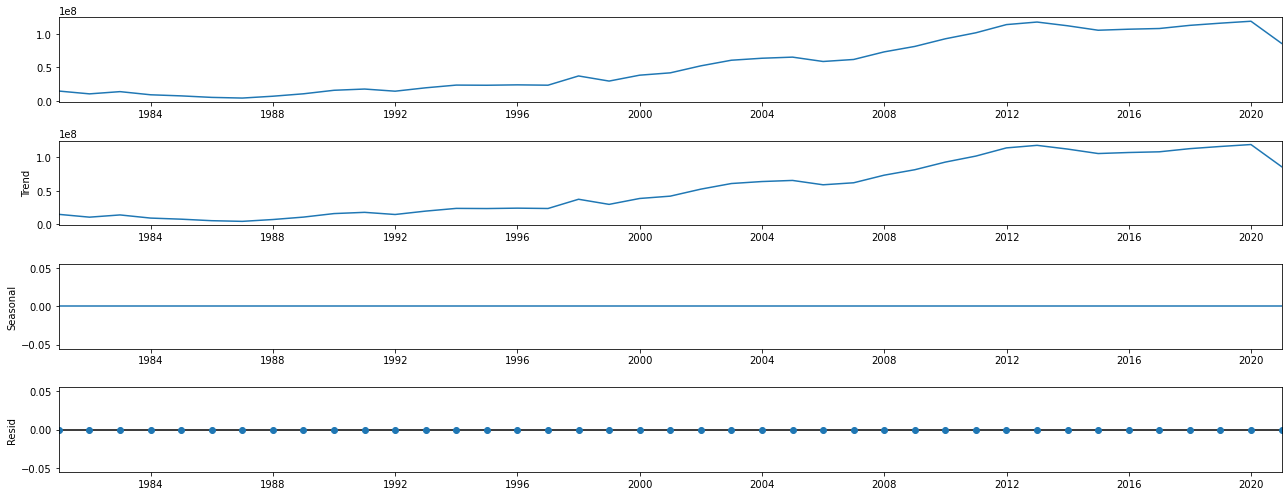

In [20]:
# Plot separate components
decomposition.plot()
plt.show()

### 5) Testing for stationarity

In [21]:
# The null hypothesis in this case would be the presence of a unit root 
# Want to disprove that there’s a unit root, which would mean that the data is stationary

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers 
# This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(profit['profit'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.531220
p-value                         0.007221
Number of Lags Used            10.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [23]:
# Test statistic is smaller than the critical value at both the five and ten percent significance levels. 
# There's also a satisfactory p-value (p < 0.05). 
# We can reject the null hypothesis and, as a result, consider the series stationary.

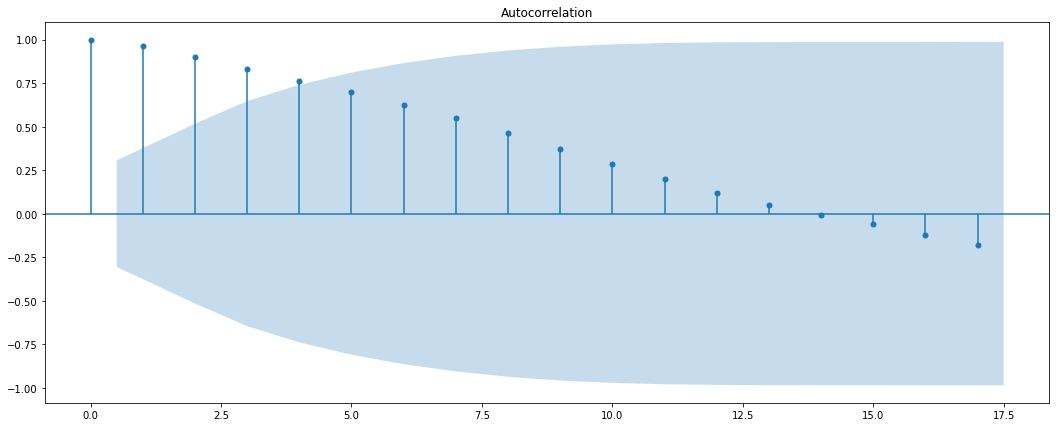

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(profit)
plt.show()

In [25]:
# There are 5 vertical lines above the confidence interval or 5 significant lags. 
# Since it's less than 10 significant lags, the minimum amount of lags for a round of differencing, there's no need to conduct it.
# Despite the Dickey-Fuller test saying that the data is stationary, the stationarity is moderately strong

### 6) Strengthening the stationarity of the data for profit column

In [26]:
# Strengthing the strength of the stationarity of the data using differencing method

data_diff = profit - profit.shift(1)
data_diff

,profit
datetime,
1980-12-31,NaN
1981-12-31,-4.208307e+06
1982-12-31,3.346765e+06
1983-12-31,-4.725598e+06
1984-12-31,-1.653337e+06
1985-12-31,-2.271070e+06
1986-12-31,-9.975015e+05
1987-12-31,2.754464e+06
1988-12-31,3.649549e+06


In [27]:
# Dropping na values in order to perform the Dickey-Fuller Stationarity test

data_diff.dropna(inplace = True)
data_diff

,profit
datetime,
1981-12-31,-4.208307e+06
1982-12-31,3.346765e+06
1983-12-31,-4.725598e+06
1984-12-31,-1.653337e+06
1985-12-31,-2.271070e+06
1986-12-31,-9.975015e+05
1987-12-31,2.754464e+06
1988-12-31,3.649549e+06
1989-12-31,5.283545e+06


In [28]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.510389
p-value                         0.007724
Number of Lags Used             0.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [29]:
# Test statistic is smaller than the critical value at both the five and ten percent significance levels. 
# There's also a satisfactory p-value (p < 0.05). 

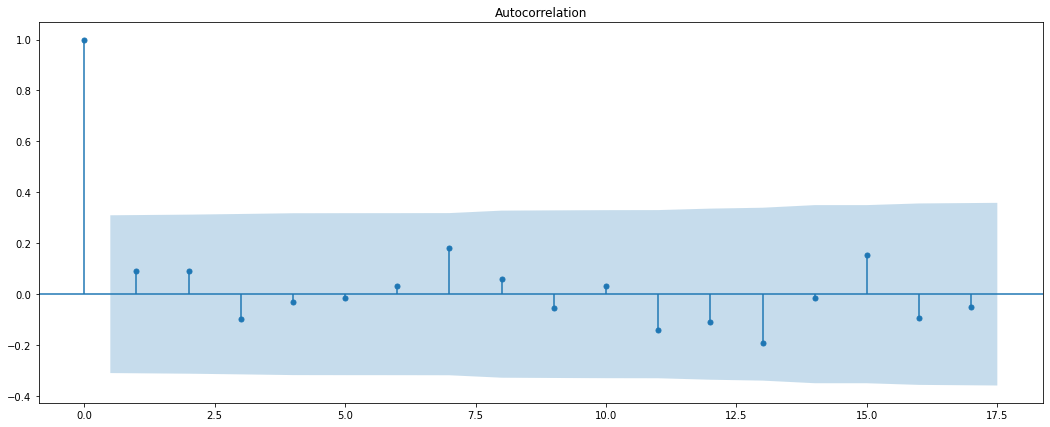

In [30]:
plot_acf(data_diff)
plt.show()

In [31]:
# Using the differencing method, there is 1 vertical line above the confidence interval or 1 significant lag. 

In [32]:
profit.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'profit.csv'))